# 8 steps of Machine Learning
1. Data gathering
2. data preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering/selection
5. Training model
6. Test model/Model evaluation
7. Hyper Parameter tuning
8. Prediction

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data gathering

In [ ]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

Check the basic info and missing values

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Return DataFrame with duplicate rows removed.
data.drop_duplicates(inplace=True)

In [ ]:
# count categorical unique value from make column
data['MAKE'].value_counts()
data.MAKE.value_counts()

In [ ]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

In [ ]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

In [ ]:
# count categorical unique value from TRANSMISSION  column
data['TRANSMISSION'].value_counts()

In [ ]:
data['FUELTYPE'].unique() # getting the name of unique value

In [ ]:
# count categorical unique value from FUELTYPE  column
data['FUELTYPE'].value_counts()

In [ ]:
data['MODELYEAR'].value_counts()

In [ ]:
# drop MODELYEAR COLUMN
data.drop(columns=['MODELYEAR'], inplace=True)

Statistical Analysis

In [ ]:
data.describe().T

# 2. Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [54]:
# each column transform categorical to numerical value and  update to dataframe
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col]) 

In [55]:
data

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,38,624,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1063,38,624,11,3.2,6,11,2,13.2,9.5,11.5,25,264
1064,38,625,11,3.0,6,11,2,13.4,9.8,11.8,24,271
1065,38,625,11,3.2,6,11,2,12.9,9.3,11.3,25,260


# 3. EDA

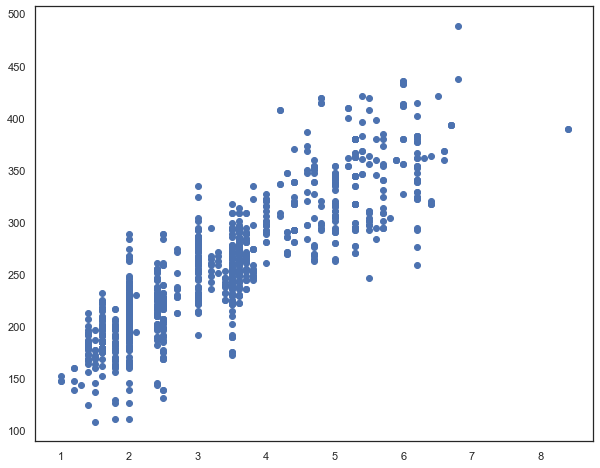

In [64]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'])
plt.show()